SVM ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("voice.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [4]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [6]:
data.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


Predictive power score

In [7]:

import ppscore as pp



In [8]:
k=pp.matrix(data)
k

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,meanfreq,meanfreq,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,meanfreq,sd,0.117528,regression,True,mean absolute error,0.013149,0.011604,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
2,meanfreq,median,0.492279,regression,True,mean absolute error,0.027193,0.013807,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
3,meanfreq,Q25,0.461188,regression,True,mean absolute error,0.038382,0.020681,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
4,meanfreq,Q75,0.111901,regression,True,mean absolute error,0.018925,0.016807,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
...,...,...,...,...,...,...,...,...,...
436,label,mindom,0.000000,regression,True,mean absolute error,0.038165,0.048989,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
437,label,maxdom,0.023368,regression,True,mean absolute error,2.791221,2.725997,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
438,label,dfrange,0.023187,regression,True,mean absolute error,2.788537,2.723878,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
439,label,modindx,0.000000,regression,True,mean absolute error,0.078465,0.084378,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


In [9]:
pp.score(data,"meanfreq","label")

{'x': 'meanfreq',
 'y': 'label',
 'ppscore': 0.16486310877177482,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.5138888888888888,
 'model_score': 0.5940306778751683,
 'model': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best')}

In [10]:
x= data.iloc[:,:-1]

In [11]:
y=data.loc[:,"label"]

In [12]:
from sklearn.preprocessing import LabelEncoder
lk=LabelEncoder()
y=lk.fit_transform(y)     
list(lk.classes_)

['female', 'male']

To carry out SVM mainly we need to follow 3 steps


1- Converting all columns into standard scaler [-1,1]


2- fitting to the right kernel


3- loss function should be assigned to "hinge"[mainly it is used] and the paramater dual is set to false [it is the default setting](There is one more called primer)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x) #converting into standard scaler
x

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

In [14]:
##splitting data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

implementing default svm

class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

----gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma

In [15]:
from sklearn.svm import SVC
from sklearn import metrics
svc =SVC()
svc.fit(x_train,y_train)
y_predict=svc.predict(x_test)
metrics.accuracy_score(y_test,y_predict)



0.9826498422712934

In [19]:
##implementing defaut linear svm 
svc=SVC(kernel="linear")
svc.fit(x_train,y_train)
y_predict=svc.predict(x_test)
metrics.accuracy_score(y_test,y_predict)

0.9763406940063092

In [23]:
##implementing defaut rbf svm 
svc=SVC(kernel="rbf")  ##No difference between default svc and rbf svc because in default svc method kermel rbf is called
svc.fit(x_train,y_train)
y_predict=svc.predict(x_test)
metrics.accuracy_score(y_test,y_predict)

0.9826498422712934

In [25]:
##implementing default poly svm
svc=SVC(kernel="poly")
svc.fit(x_train,y_train)
y_predict=svc.predict(x_test)
metrics.accuracy_score(y_test,y_predict)

0.9684542586750788

linear---c

polynomial--- c,degree,coeff0

rbf-----gamma,c

linear svm with adjusting c value

In [30]:
from sklearn.model_selection import cross_val_score
c_range =list(range(1,26))
acc_score=[]
for c in c_range:
    svc=SVC(kernel="linear",C=c)
    scores=cross_val_score(svc,x,y,cv=10,scoring='accuracy')
    acc_score.append(np.mean(scores))
print(acc_score)
    

[0.9696991175178692, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.9687527452781215, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698, 0.9678043764724673, 0.9678043764724673, 0.9678043764724673, 0.9678043764724673, 0.9681208321686698, 0.968436289581919, 0.968436289581919, 0.9681198338857164, 0.9681198338857164]


plotting the scores to identify an accurate score

Text(0, 0.5, 'Cross validation scores')

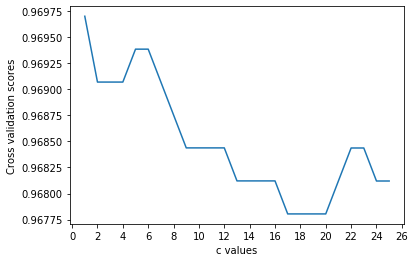

In [33]:
c_values=list(range(1,26))
plt.plot(c_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel("c values")
plt.ylabel("Cross validation scores")

In [39]:
#Now that we can see that there is a peak between 1-2. To precisely identify the correct c value a detailed plot is drawn between 1-2 with an interval of 0.1
from sklearn.model_selection import cross_val_score
c_range =list(np.arange(0.1,2,0.1))
acc_score=[]
for c in c_range:
    svc=SVC(kernel="linear",C=c)
    scores=cross_val_score(svc,x,y,cv=10,scoring='accuracy')
    acc_score.append(np.mean(scores))
print(acc_score)

[0.9706474863235236, 0.9693846583875733, 0.9693836601046201, 0.9693836601046201, 0.9696991175178692, 0.9696991175178692, 0.9693836601046201, 0.9696981192349158, 0.9693826618216667, 0.9696991175178692, 0.9696991175178692, 0.9696991175178692, 0.9696991175178692, 0.9690672044084174, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.969068202691371]


Text(0, 0.5, 'Cross validation scores')

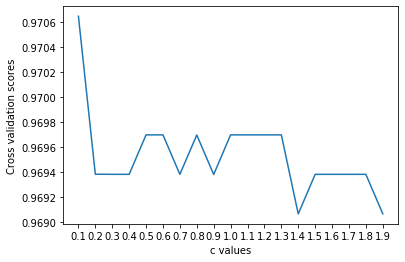

In [41]:
c_values=list(np.arange(0.1,2,0.1))
plt.plot(c_values,acc_score)
plt.xticks(np.arange(0.1,2,0.1))
plt.xlabel("c values")
plt.ylabel("Cross validation scores")

In [45]:
##implementing rbf svm with different gamma values
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_scores=[]
for g in gamma_range:
    svc=SVC(kernel="rbf",C=0.1,gamma=g)
    scores=cross_val_score(svc,x,y,cv=10,scoring="accuracy")
    acc_scores.append(np.mean(scores))
print(acc_scores)
    
    

[0.557530048316895, 0.8841352873058341, 0.9526544343728786, 0.9567434013496786, 0.7067933154973447, 0.5430419678153575, 0.5756369045242183]


Text(0, 0.5, 'Accuracy scores')

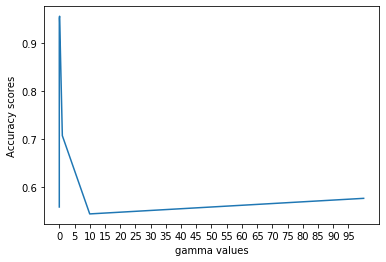

In [54]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
plt.plot(gamma_range,acc_scores)
plt.xticks(np.arange(0.0001,100,5))
plt.xlabel("gamma values")
plt.ylabel("Accuracy scores")

In [55]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_scores=[]
for g in gamma_range:
    svc=SVC(kernel="rbf",C=0.1,gamma=g)
    scores=cross_val_score(svc,x,y,cv=10,scoring="accuracy")
    acc_scores.append(np.mean(scores))
print(acc_scores)

[0.557530048316895, 0.8841352873058341, 0.9526544343728786, 0.9567434013496786]


Text(0, 0.5, 'Accuracy scores')

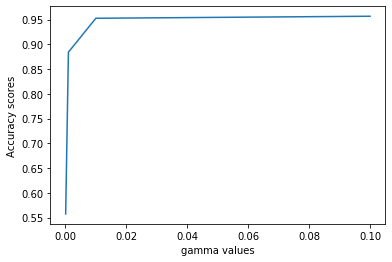

In [68]:
gamma_range=[0.0001,0.001,0.01,0.1]
plt.plot(gamma_range,acc_scores)
#plt.xticks(np.arange(0.0001,0.1,0.01))
plt.xlabel("gamma values")
plt.ylabel("Accuracy scores")

##we can predict that at gamma=0.1 the accuracy is highest

In [73]:
degree=[2,3,4,5]
polyscores=[]
for d in degree:
    svc=SVC(kernel="poly",degree=d)
    scores=cross_val_score(svc,x,y,cv=10,scoring="accuracy")
    polyscores.append(np.mean(scores))
print(polyscores)

[0.8515842750469194, 0.9450654873617378, 0.8313989937307829, 0.8661622010142555]


Text(0, 0.5, 'Accuracy scores')

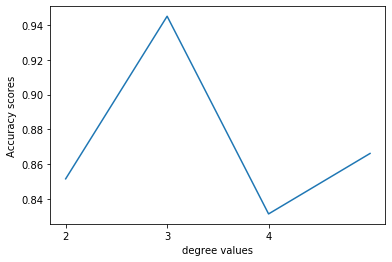

In [75]:
degree=[2,3,4,5]
plt.plot(degree,polyscores)
plt.xticks(np.arange(2,5,1))
plt.xlabel("degree values")
plt.ylabel("Accuracy scores")

##clearly we can see a peak at degree=3
from the above cases we can identify that at gamma=0.1 we get high accuracy for rbf kernel and at c=0.1 we get a high accuracy in linear kernel
Now we will try to predict the test data set using the above hyper-parameters

In [77]:
svc=SVC(kernel="linear",C=0.1)
svc.fit(x_train,y_train)
y_predict=svc.predict(x_test)
metrics.accuracy_score(y_predict,y_test)

0.9779179810725552

In [79]:
svc=SVC(kernel="rbf",gamma=0.1)
svc.fit(x_train,y_train)
y_predict=svc.predict(x_test)
metrics.accuracy_score(y_predict,y_test)

0.9810725552050473

In [82]:
svc=SVC(kernel="poly",degree=3) 
svc.fit(x_train,y_train)
y_predict=svc.predict(x_test)
metrics.accuracy_score(y_predict,y_test)

0.9684542586750788

This can be further continued by running grid search to find the best hyper-parameters 
But as of now we can say that "rbf" performs best on the current testing data